In [ ]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation
import sys
from population import Population
from utils import arkiv_proccess, greedy_selection, arkiv_multiple_font, visualize_process, visualize_process_multiple, mean_proccess
import os


In [18]:
dir_ = "gemma_nsgaii_logs"
model_name = "gemma-7b"
sample_id = "2"
pcts_list, pcts_font, merge_font = arkiv_multiple_font(dir=dir_, 
                                                       model_name=model_name,
                                                       sample_id=sample_id)


In [14]:

ani = visualize_process(final_history=pcts_font[1])
ani.save("gemma_7b_nsgaii_logs_0_0.1.gif", writer='ffmpeg', fps=10000 )


MovieWriter ffmpeg unavailable; using Pillow instead.


In [19]:

ani = visualize_process_multiple(final_histories=pcts_font)
ani.save("gemma_7b_nsgaii_logs_1_allfont.gif", writer='ffmpeg', fps=10000 )


MovieWriter ffmpeg unavailable; using Pillow instead.


In [9]:
def mean_proccess(model_name, dir):
    path_template = r"{model_name}_ngsgaii_golden_answer_{pct}_{id}.pkl"
    final_proccess = []
    for id in range(10):
        proccess_full = []
        for i, pct in enumerate([0.05, 0.1, 0.2, 0.5]):
            path = os.path.join(dir, path_template.format(model_name=model_name, pct=pct, id=id))
            history = pkl.load(open(path, "rb"))
            final_font = arkiv_proccess(history)
            final_font = [np.array(font) for font in final_font]

            proccess_retri_list = [np.min(font[:, 0]) for font in final_font]
            proccess_reader_list = [np.min(font[:, 1]) for font in final_font]
            proccess_full.append(np.column_stack((proccess_retri_list, proccess_reader_list)))
        
        proccess_full = np.array(proccess_full)
        final_proccess.append(proccess_full)

    final_proccess = np.array(final_proccess)
    proccess_mean = np.mean(final_proccess, axis=0)
    return proccess_mean

In [11]:
def plot_scores(proccess_full):
    pcts = [0.05, 0.1, 0.2, 0.5]
    colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
    generations = np.arange(proccess_full.shape[1])
    
    plt.figure(figsize=(10, 5))
    for i, (pct, color) in enumerate(zip(pcts, colors)):
        plt.plot(generations, proccess_full[i, :, 0], label=f'pct={pct}', color=color)
    plt.xlabel('Generation')
    plt.ylabel('L_RSR')
    plt.title('L_RSR Score over Generations')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 5))
    for i, (pct, color) in enumerate(zip(pcts, colors)):
        plt.plot(generations, proccess_full[i, :, 1], label=f'pct={pct}', color=color)
    plt.xlabel('Generation')
    plt.ylabel('GPR score')
    plt.title('GPR Score over Generations')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

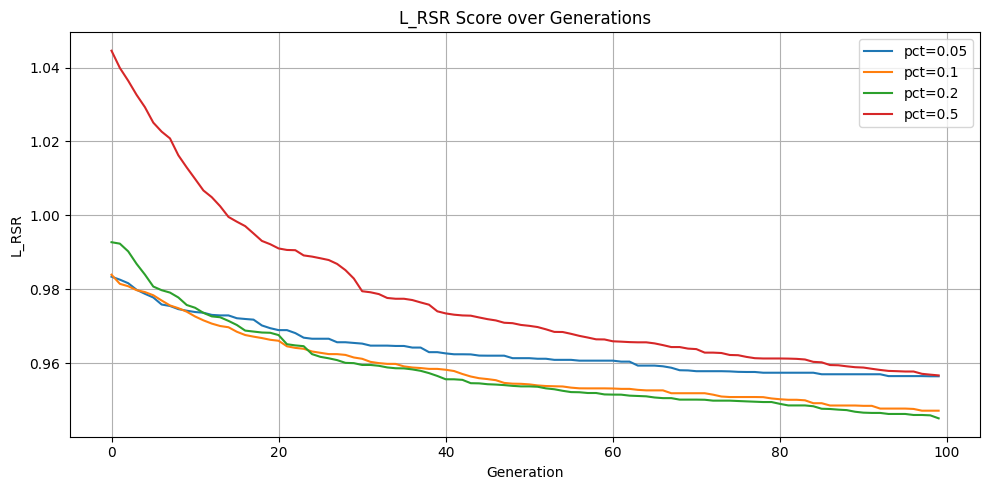

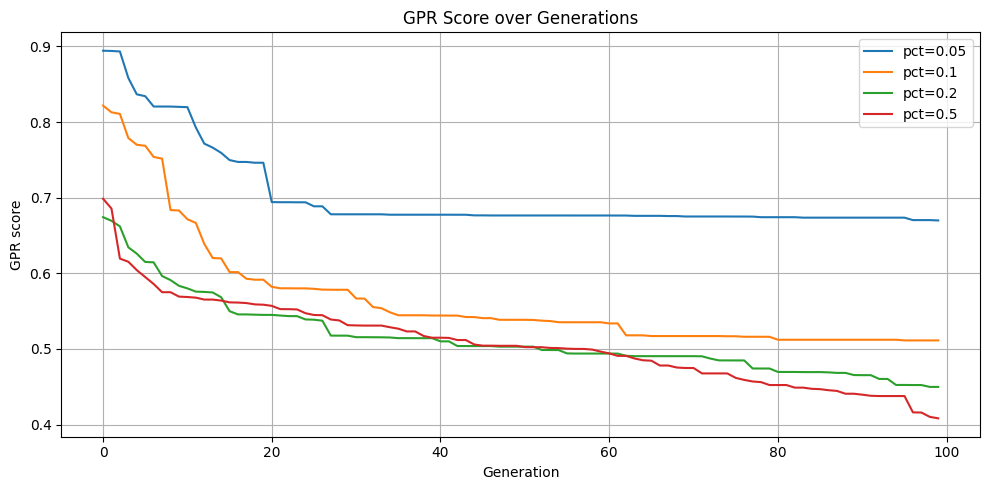

In [ ]:
dir_ = "llama_7b_nsgaii_logs"
model_name = "llama-7b"
proccess_mean = mean_proccess(model_name=model_name, dir=dir_)
plot_scores(proccess_full=proccess_mean)

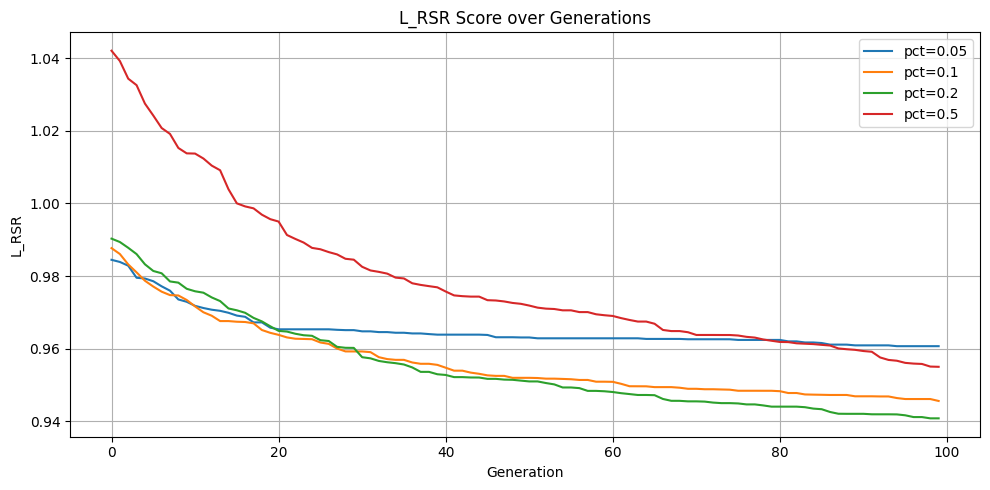

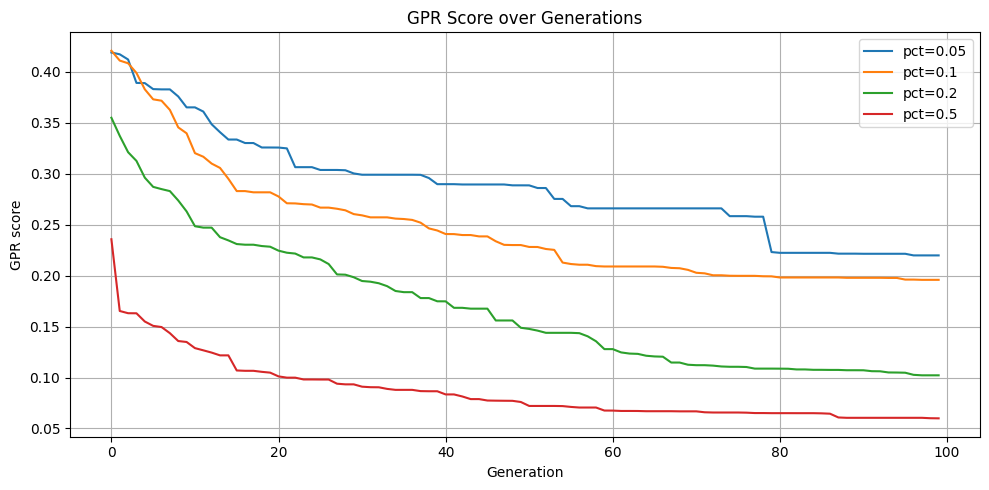

In [20]:
dir_ = "gemma_nsgaii_logs"
model_name = "gemma-7b"
proccess_mean = mean_proccess(model_name=model_name, dir=dir_)
plot_scores(proccess_full=proccess_mean)